In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [5]:
#Import the dataset
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [8]:
#Display some digits
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

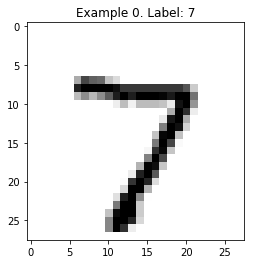

In [9]:
display(0)

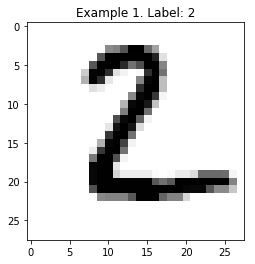

In [10]:
display(1)

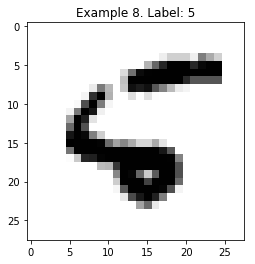

In [11]:
display(8)

In [12]:
print(len(data[0]))

784


In [13]:
#Fit a Linear Classifier¶
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x1128b62b0>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

In [14]:
#Evaluate accuracy
classifier.evaluate(test_data, test_labels)
print (classifier.evaluate(test_data, test_labels)["accuracy"])

/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


0.9137


/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Predicted 7, Label: 7


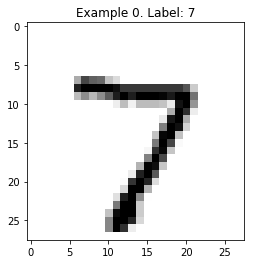

In [19]:
#Classify a few examples¶
# here's one it gets right
#print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))

prediction = classifier.predict(np.array([test_data[0]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[0]))
display(0)

/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py:248: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  equality = a == b


Predicted 6, Label: 5


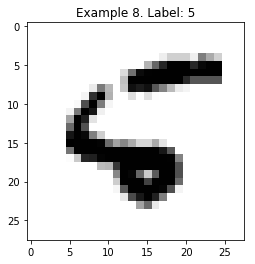

In [20]:
# and one it gets wrong
prediction = classifier.predict(np.array([test_data[8]], dtype=float), as_iterable=False)
print("Predicted %d, Label: %d" % (prediction, test_labels[8]))
display(8)

In [24]:
#Visualize learned weights¶
weights = classifier.weights
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

AttributeError: 'LinearClassifier' object has no attribute 'weights'